## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston
data=load_boston()
X,y=data['data'],data['target']
X.shape,y.shape

((506, 13), (506,))

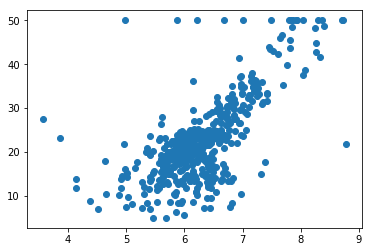

In [2]:
x=X[:,5]
import matplotlib.pyplot as plt
%matplotlib inline
def draw_scatter_plot():
    plt.scatter(x,y)
draw_scatter_plot()

In [3]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
import numpy as np
def loss_1(y,y_hat):
    return np.sum((y-y_hat)**2)/len(y)
def loss_2(y,y_hat):
    return np.sum(np.abs(y-y_hat))/len(y)

In [7]:
#1 ÈöèÊú∫ÈÄâÊã© k„ÄÅb
import random
trying_times=1000
min_loss=float('inf')
best_k,best_b=None,None
for i in range(trying_times):
    k=random.random()*200-100
    b=random.random()*200-100
    y_hat=k*x+b
    
    current_loss=loss_1(y,y_hat)
#     current_loss=loss_2(y,y_hat)
    if current_loss<min_loss:
        min_loss=current_loss
        best_k,best_b=k,b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -44.01792167129408 best_b: 48.860134315569695, and the loss is: 64088.56091282876
When time is : 6, get best_k: -19.102812802807676 best_b: -40.35157230717261, and the loss is: 33902.06971656203
When time is : 9, get best_k: -6.740135558054931 best_b: 24.345702864576182, and the loss is: 1811.265413504743
When time is : 22, get best_k: -1.5635867762391058 best_b: 51.24089698902097, and the loss is: 456.159890474904
When time is : 66, get best_k: 4.067658137456689 best_b: 4.760439109735188, and the loss is: 116.79381002968205
When time is : 67, get best_k: 14.609325963430479 best_b: -67.43180734008982, and the loss is: 61.96495838442146
When time is : 698, get best_k: 10.450769728068181 best_b: -41.74203253665063, and the loss is: 46.46912596559292
When time is : 969, get best_k: 8.839350101132325 best_b: -34.019268753949405, and the loss is: 44.63455148848815


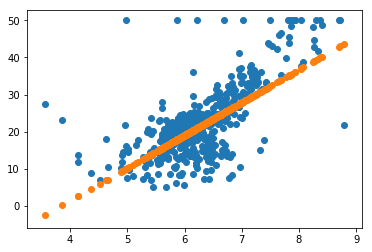

In [8]:
k=8.84
b=-34.02
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

In [9]:
#Ê†πÊçÆtargetË∞ÉÊï¥k„ÄÅbÁöÑÊñπÂêë
trying_times=1000
min_loss=float('inf')

best_k=random.random()*200-100
best_b=random.random()*200-100

direction=[
    (+1,-1),
    (+1,-1),
    (-1,-1),
    (-1,+1)
]
next_direction=random.choice(direction)
scalar=0.1
for i in range(trying_times):
    k_direction,b_direction=next_direction
    current_k,current_b=best_k+k_direction*scalar,best_b+b_direction*scalar
    y_hat=current_k*x+current_b
    current_loss=loss_1(y,y_hat)
    if current_loss<min_loss:
        min_loss=current_loss
        best_k,best_b=current_k,current_b
        next_direction=next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))        
    else:
        next_direction=random.choice(direction)

When time is : 0, get best_k: -79.31671337935366 best_b: 58.526895391584695, and the loss is: 217785.45812868507
When time is : 1, get best_k: -79.21671337935366 best_b: 58.426895391584694, and the loss is: 217288.21948568994
When time is : 2, get best_k: -79.11671337935367 best_b: 58.32689539158469, and the loss is: 216791.54924381137
When time is : 3, get best_k: -79.01671337935367 best_b: 58.22689539158469, and the loss is: 216295.4474030492
When time is : 4, get best_k: -78.91671337935368 best_b: 58.12689539158469, and the loss is: 215799.9139634036
When time is : 5, get best_k: -78.81671337935369 best_b: 58.02689539158469, and the loss is: 215304.94892487445
When time is : 6, get best_k: -78.71671337935369 best_b: 57.92689539158469, and the loss is: 214810.55228746173
When time is : 7, get best_k: -78.6167133793537 best_b: 57.826895391584685, and the loss is: 214316.72405116554
When time is : 8, get best_k: -78.5167133793537 best_b: 57.726895391584684, and the loss is: 213823.4642

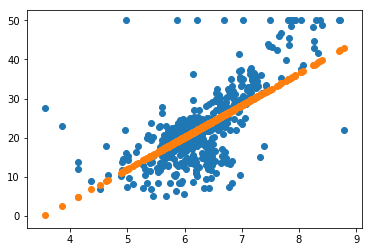

In [10]:
k=8.183
b=-28.973
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

In [12]:
#Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ï
def gradient_k(x,y,y_hat):
    return -2*np.sum((y-y_hat)*x)/len(y)
def gradient_b(y,y_hat):
    return -2*np.sum(y-y_hat)/len(y)

In [34]:
trying_times=200
learning_rate=0.01
min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
for i in range(trying_times):
    y_hat=current_k*x+current_b
    current_loss=loss_1(y,y_hat)
    print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, current_loss))
    current_k=current_k-gradient_k(x,y,y_hat)*learning_rate
    current_b=current_b-gradient_b(y,y_hat)*learning_rate    

When time is : 0, get best_k: 12.250241478260676 best_b: -30.992000865297825, and the loss is: 599.0184966062432
When time is : 1, get best_k: 9.270032008313187 best_b: -31.461270498462458, and the loss is: 61.80198393791862
When time is : 2, get best_k: 8.732337577160031 best_b: -31.54656420063693, and the loss is: 44.30820405045495
When time is : 3, get best_k: 8.635404683528247 best_b: -31.562567770529657, and the loss is: 43.73848764074544
When time is : 4, get best_k: 8.618008940564701 best_b: -31.566067513092854, and the loss is: 43.71988035114615
When time is : 5, get best_k: 8.614965969890482 best_b: -31.567310743116344, and the loss is: 43.719219206553625
When time is : 6, get best_k: 8.614512990980124 best_b: -31.568146629376585, and the loss is: 43.719142480304825
When time is : 7, get best_k: 8.61452736327412 best_b: -31.568908861774887, and the loss is: 43.71908481138748
When time is : 8, get best_k: 8.614626047840352 best_b: -31.569657656017483, and the loss is: 43.719027

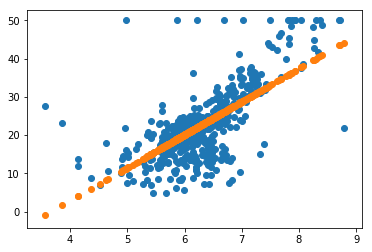

In [35]:
k=8.636
b=-31.70
y_hat=k*x+b
draw_scatter_plot()
plt.scatter(x,y_hat)
plt.show()

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: ÊÄª‰ΩìÂàÜÂ∏ÉÊú™Áü•ÔºåÊ≤°ÊúâÂäûÊ≥ïÁî®Â§çÊùÇÁöÑÂÖ¨ÂºèË°®Á§∫Âá∫ÂÖ∑ÊúâÊ≥õÂåñËÉΩÂäõÁöÑÊ®°Âûã

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:Áî±‰∫éÊØè‰∏ÄÊ¨°Ëø≠‰ª£ÂèÇÊï∞ÈÄâÊã©ÁöÑÈöèÊú∫ÊÄßÔºå‰ΩøÂæóËØØÂ∑ÆÁöÑÂèòÂä®ÂÖ∑ÊúâÈöèÊú∫ÊÄßÔºåËØØÂ∑Æ‰∏ç‰ºöÈöèÁùÄËø≠‰ª£Ê¨°Êï∞ÁöÑÂ¢ûÂä†ËÄåÂèòÂ∞è„ÄÇ

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:Á¨¨‰∫åÁßçÊñπÊ≥ïÊØîÁ¨¨‰∏ÄÁßçÂ•ΩÔºåÂõ†‰∏∫ÊØèÊ¨°Ëø≠‰ª£ÈÉΩÂ∞ΩÈáèÂú®ÂæÄËØØÂ∑ÆÂèòÂ∞èÁöÑÊñπÂêëË∞ÉÊï¥ÂèÇÊï∞„ÄÇÊñπÊ≥ï‰∫åÁöÑÂä£ÂäøÊòØÂ¶ÇÊûúÂèÇÊï∞ÂæàÂ§öÔºåÂêÑÂèÇÊï∞Ë∞ÉÊï¥ÊñπÂêëÁöÑÊéíÂàóÁªÑÂêàÂæàÂ§öÔºåËø≠‰ª£ÁöÑÊ¨°Êï∞ÈúÄË¶ÅÂæàÂ§ö„ÄÇ

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:Ê¢ØÂ∫¶ÁöÑÊñπÂêëÊòØÊçüÂ§±ÂáΩÊï∞‰∏ãÈôçÊúÄÂø´ÁöÑÊñπÂêëÔºåÂáèÂ∞ëËø≠‰ª£Ê¨°Êï∞

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:Ê¢ØÂ∫¶ÊòØ‰∏Ä‰∏™ÂêëÈáèÔºåË°®Á§∫Êüê‰∏ÄÂáΩÊï∞Âú®ËØ•ÁÇπÂ§ÑÁöÑÊñπÂêëÂØºÊï∞Ê≤øÁùÄËØ•ÊñπÂêëÂèñÂæóÊúÄÂ§ßÂÄºÔºåÂç≥ÂáΩÊï∞Âú®ËØ•ÁÇπÂ§ÑÊ≤øÁùÄËØ•ÊñπÂêëÔºàÊ≠§Ê¢ØÂ∫¶ÁöÑÊñπÂêëÔºâÂèòÂåñÊúÄÂø´ÔºåÂèòÂåñÁéáÊúÄÂ§ßÔºà‰∏∫ËØ•Ê¢ØÂ∫¶ÁöÑÊ®°Ôºâ„ÄÇ‚Äú‰∏ãÈôç‚ÄùÊòØÊ≤øÁùÄÊ¢ØÂ∫¶ÁöÑÂèçÊñπÂêëË∞ÉÊï¥ÂèÇÊï∞„ÄÇ

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:Â¶ÇÊûúÂ≠¶‰π†ÁéáËÆæÁΩÆÁöÑÊÅ∞ÂΩìÔºåÁî±‰∫éÊ¢ØÂ∫¶ÁöÑË¥üÊñπÂêëÊòØ‰ΩøÂæóÊçüÂ§±ÂáΩÊï∞‰∏ãÈôçÁöÑÊúÄÂø´ÁöÑÊñπÂêëÔºåÈÇ£‰πàÊØèËøõË°å‰∏ÄÊ¨°Ëø≠‰ª£ÔºåÈÉΩ‰ºöÊúÄÂø´ÁöÑÂáèÂ∞èÊçüÂ§±„ÄÇ

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:Âü∫‰∫éÊï∞ÊçÆÊûÑÂª∫Ê¶ÇÁéáÁªüËÆ°Ê®°ÂûãÂπ∂ËøêÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÊú™Áü•Êï∞ÊçÆÁöÑÈ¢ÑÊµã„ÄÇ

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [1]:
import requests
r=requests.get("http://www.bjsubway.com/station/zjgls/")
r.encoding='gbk'
data=r.text

In [2]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(data,'lxml')
text=soup.get_text()
#text

In [3]:
import re
pattern=r'\n\n\n(.+‚Äî‚Äî.+)\n([0-9]+)\n(?:‰∏äË°å/‰∏ãË°å|‰∏äË°å|‰∏ãË°å)'
route=re.findall(pattern,text)
route

[('ËãπÊûúÂõ≠‚Äî‚ÄîÂè§Âüé', '2606'),
 ('Âè§Âüé‚Äî‚ÄîÂÖ´ËßíÊ∏∏‰πêÂõ≠', '1921'),
 ('ÂÖ´ËßíÊ∏∏‰πêÂõ≠‚Äî‚ÄîÂÖ´ÂÆùÂ±±', '1953'),
 ('ÂÖ´ÂÆùÂ±±‚Äî‚ÄîÁéâÊ≥âË∑Ø', '1479'),
 ('ÁéâÊ≥âË∑Ø‚Äî‚Äî‰∫îÊ£µÊùæ', '1810'),
 ('‰∫îÊ£µÊùæ‚Äî‚Äî‰∏áÂØøË∑Ø', '1778'),
 ('‰∏áÂØøË∑Ø‚Äî‚ÄîÂÖ¨‰∏ªÂùü', '1313'),
 ('ÂÖ¨‰∏ªÂùü‚Äî‚ÄîÂÜõ‰∫ãÂçöÁâ©È¶Ü', '1172'),
 ('ÂÜõ‰∫ãÂçöÁâ©È¶Ü‚Äî‚ÄîÊú®Ê®®Âú∞', '1166'),
 ('Êú®Ê®®Âú∞‚Äî‚ÄîÂçóÁ§ºÂ£´Ë∑Ø', '1291'),
 ('ÂçóÁ§ºÂ£´Ë∑Ø‚Äî‚ÄîÂ§çÂÖ¥Èó®', '424'),
 ('Â§çÂÖ¥Èó®‚Äî‚ÄîË•øÂçï', '1590'),
 ('Ë•øÂçï‚Äî‚ÄîÂ§©ÂÆâÈó®Ë•ø', '1217'),
 ('Â§©ÂÆâÈó®Ë•ø‚Äî‚ÄîÂ§©ÂÆâÈó®‰∏ú', '925'),
 ('Â§©ÂÆâÈó®‰∏ú‚Äî‚ÄîÁéãÂ∫ú‰∫ï', '852'),
 ('ÁéãÂ∫ú‰∫ï‚Äî‚Äî‰∏úÂçï', '774'),
 ('‰∏úÂçï‚Äî‚ÄîÂª∫ÂõΩÈó®', '1230'),
 ('Âª∫ÂõΩÈó®‚Äî‚ÄîÊ∞∏ÂÆâÈáå', '1377'),
 ('Ê∞∏ÂÆâÈáå‚Äî‚ÄîÂõΩË¥∏', '790'),
 ('ÂõΩË¥∏‚Äî‚ÄîÂ§ßÊúõË∑Ø', '1385'),
 ('Â§ßÊúõË∑Ø‚Äî‚ÄîÂõõÊÉ†', '1673'),
 ('ÂõõÊÉ†‚Äî‚ÄîÂõõÊÉ†‰∏ú', '1714'),
 ('Ë•øÁõ¥Èó®‚Äî‚ÄîËΩ¶ÂÖ¨Â∫Ñ', '909'),
 ('ËΩ¶ÂÖ¨Â∫Ñ‚Äî‚ÄîÈòúÊàêÈó®', '960'),
 ('ÈòúÊàêÈó®‚Äî‚ÄîÂ§çÂÖ¥Èó®', '1832'),
 ('Â§çÂÖ¥Èó®‚Äî‚ÄîÈï

In [4]:
station_line=[]
for r in route:
    s1,s2=r[0].split('‚Äî‚Äî')
    station_line.append((s1,s2,float(r[1])))
station_line

[('ËãπÊûúÂõ≠', 'Âè§Âüé', 2606.0),
 ('Âè§Âüé', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 1921.0),
 ('ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÂÖ´ÂÆùÂ±±', 1953.0),
 ('ÂÖ´ÂÆùÂ±±', 'ÁéâÊ≥âË∑Ø', 1479.0),
 ('ÁéâÊ≥âË∑Ø', '‰∫îÊ£µÊùæ', 1810.0),
 ('‰∫îÊ£µÊùæ', '‰∏áÂØøË∑Ø', 1778.0),
 ('‰∏áÂØøË∑Ø', 'ÂÖ¨‰∏ªÂùü', 1313.0),
 ('ÂÖ¨‰∏ªÂùü', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 1172.0),
 ('ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Êú®Ê®®Âú∞', 1166.0),
 ('Êú®Ê®®Âú∞', 'ÂçóÁ§ºÂ£´Ë∑Ø', 1291.0),
 ('ÂçóÁ§ºÂ£´Ë∑Ø', 'Â§çÂÖ¥Èó®', 424.0),
 ('Â§çÂÖ¥Èó®', 'Ë•øÂçï', 1590.0),
 ('Ë•øÂçï', 'Â§©ÂÆâÈó®Ë•ø', 1217.0),
 ('Â§©ÂÆâÈó®Ë•ø', 'Â§©ÂÆâÈó®‰∏ú', 925.0),
 ('Â§©ÂÆâÈó®‰∏ú', 'ÁéãÂ∫ú‰∫ï', 852.0),
 ('ÁéãÂ∫ú‰∫ï', '‰∏úÂçï', 774.0),
 ('‰∏úÂçï', 'Âª∫ÂõΩÈó®', 1230.0),
 ('Âª∫ÂõΩÈó®', 'Ê∞∏ÂÆâÈáå', 1377.0),
 ('Ê∞∏ÂÆâÈáå', 'ÂõΩË¥∏', 790.0),
 ('ÂõΩË¥∏', 'Â§ßÊúõË∑Ø', 1385.0),
 ('Â§ßÊúõË∑Ø', 'ÂõõÊÉ†', 1673.0),
 ('ÂõõÊÉ†', 'ÂõõÊÉ†‰∏ú', 1714.0),
 ('Ë•øÁõ¥Èó®', 'ËΩ¶ÂÖ¨Â∫Ñ', 909.0),
 ('ËΩ¶ÂÖ¨Â∫Ñ', 'ÈòúÊàêÈó®', 960.0),
 ('ÈòúÊàêÈó®', 'Â§çÂÖ¥Èó®', 1832.0),
 ('Â§çÂÖ¥Èó®', 'ÈïøÊ§øË°ó', 1234.0),
 ('ÈïøÊ§øË°ó', 'ÂÆ£Ê≠¶Èó®', 929.0

In [5]:
station_connection={}
for t in station_line:
    s1,s2=t[0],t[1]
    if s1 not in station_connection:
        station_connection[s1]=[]
        station_connection[s1].append(s2)
    else:
        station_connection[s1].append(s2)
    if s2 not in station_connection:
        station_connection[s2]=[]
        station_connection[s2].append(s1)
    else:
        station_connection[s2].append(s1)
station_connection

{'T2Ëà™Á´ôÊ•º': ['T3Ëà™Á´ôÊ•º', '‰∏âÂÖÉÊ°•'],
 'T3Ëà™Á´ôÊ•º': ['‰∏âÂÖÉÊ°•', 'T2Ëà™Á´ôÊ•º'],
 '‰∏ÉÈáåÂ∫Ñ': ['ÂÖ≠ÈáåÊ°•', '‰∏∞Âè∞‰∏úÂ§ßË°ó', 'Â§ß‰∫ï', 'Ë•øÂ±Ä'],
 '‰∏áÂØøË∑Ø': ['‰∫îÊ£µÊùæ', 'ÂÖ¨‰∏ªÂùü'],
 '‰∏áÊ∫êË°ó': ['‰∫¶Â∫ÑÊñáÂåñÂõ≠', 'Ëç£‰∫¨‰∏úË°ó'],
 '‰∏âÂÖÉÊ°•': ['Â§™Èò≥ÂÆ´', '‰∫ÆÈ©¨Ê°•', '‰∏úÁõ¥Èó®', 'T3Ëà™Á´ôÊ•º', 'T2Ëà™Á´ôÊ•º'],
 '‰∏äÂú∞': ['‰∫îÈÅìÂè£', 'Ë•ø‰∫åÊóó'],
 '‰∏úÂçï': ['ÁéãÂ∫ú‰∫ï', 'Âª∫ÂõΩÈó®', 'ÁÅØÂ∏ÇÂè£', 'Â¥áÊñáÈó®'],
 '‰∏úÂõõ': ['Âº†Ëá™Âø†Ë∑Ø', 'ÁÅØÂ∏ÇÂè£', 'ÂçóÈî£ÈºìÂ∑∑', 'ÊúùÈò≥Èó®'],
 '‰∏úÂõõÂçÅÊù°': ['ÊúùÈò≥Èó®', '‰∏úÁõ¥Èó®'],
 '‰∏úÂ§èÂõ≠': ['ÈÉùÂÆ∂Â∫ú', 'ÊΩûÂüé'],
 '‰∏úÂ§ßÊ°•': ['ÊúùÈò≥Èó®', 'ÂëºÂÆ∂Ê•º'],
 '‰∏úÊπñÊ∏†': ['Êúõ‰∫¨', 'Êù•ÂπøËê•'],
 '‰∏úÁõ¥Èó®': ['‰∏úÂõõÂçÅÊù°', 'ÈõçÂíåÂÆ´', 'Êü≥Ëä≥', '‰∏âÂÖÉÊ°•'],
 '‰∏úÈ£éÂåóÊ°•': ['Êû£Ëê•', 'Â∞ÜÂè∞'],
 '‰∏≠ÂÖ≥Êùë': ['Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®', 'Êµ∑Ê∑ÄÈªÑÂ∫Ñ'],
 '‰∏∞Âè∞‰∏úÂ§ßË°ó': ['‰∏ÉÈáåÂ∫Ñ', '‰∏∞Âè∞ÂçóË∑Ø'],
 '‰∏∞Âè∞ÂçóË∑Ø': ['‰∏∞Âè∞‰∏úÂ§ßË°ó', 'ÁßëÊÄ°Ë∑Ø'],
 '‰∏∞Âè∞ÁßëÊäÄÂõ≠': ['ÁßëÊÄ°Ë∑Ø', 'ÈÉ≠ÂÖ¨Â∫Ñ'],
 '‰∏∞Âè∞Á´ô

In [6]:
r2=requests.get("https://www.cnblogs.com/tianlin106/p/7007511.html")
r2.encoding='utf-8'
long_lat=r2.text
soup=BeautifulSoup(long_lat,'lxml')
text2=soup.get_text()
#text2

In [7]:
pattern2=r'(?:\n|\|)(.+),(\d+.\d+),(\d+.\d+)'
loc=re.findall(pattern2,text2)
location=loc[0][0].split('|')
location[-1]=location[-1]+','+loc[0][-2]+','+loc[0][-1]
location

['ËãπÊûúÂõ≠,39.9263251384,116.1777806282',
 'Âè§Âüé,39.9072014648,116.1902475357',
 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠,39.9074319023,116.2128210068',
 'ÂÖ´ÂÆùÂ±±,39.9072673042,116.2358236313',
 'ÁéâÊ≥âË∑Ø,39.9073331435,116.2530326843',
 '‰∫îÊ£µÊùæ,39.9078269362,116.2740182877',
 '‰∏áÂØøË∑Ø,39.9074319023,116.2951755524',
 'ÂÖ¨‰∏ªÂùü,39.9074319023,116.3097667694',
 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü,39.9074648219,116.3240146637',
 'Êú®Ê®®Âú∞,39.9076294195,116.3374471664',
 'ÂçóÁ§ºÂ£´Ë∑Ø,39.9072014648,116.3525962830',
 'Â§çÂÖ¥Èó®,39.9071685451,116.3565444946',
 'Ë•øÂçï,39.9074319023,116.3742685318',
 'Â§©ÂÆâÈó®Ë•ø,39.9074648219,116.3917350769',
 'Â§©ÂÆâÈó®‰∏ú,39.9077281779,116.4016485214',
 'ÁéãÂ∫ú‰∫ï,39.9080244523,116.4115619659',
 '‰∏úÂçï,39.9081890486,116.4179134369',
 'Âª∫ÂõΩÈó®,39.9085182400,116.4358091354',
 'Ê∞∏ÂÆâÈáå,39.9083865636,116.4504861832',
 'ÂõΩË¥∏,39.9091436994,116.4619016647',
 'Â§ßÊúõË∑Ø,39.9085182400,116.4770936966',
 'ÂõõÊÉ†,39.9087157541,116.4954614639',
 'ÂõõÊÉ†‰∏ú,39.9085182400,116.5153312683',
 'Âåó

In [8]:
station_location={}
for s in location:
    station,long,lat=s.split(',')
    long,lat=float(long),float(lat)
    station_location[station]=(long,lat)

In [9]:
station_location

{'‰∏ÉÈáåÂ∫Ñ': (39.8675310111, 116.2942126393),
 '‰∏áÂØøË∑Ø': (39.907475, 116.295134),
 '‰∏âÂÖÉÊ°•': (39.9613658535, 116.4568376541),
 '‰∏äÂú∞': (40.032981, 116.320205),
 '‰∏úÂçï': (39.908283, 116.418076),
 '‰∏úÂõõ': (39.9243700208, 116.4174936712),
 '‰∏úÂõõÂçÅÊù°': (39.933661, 116.434216),
 '‰∏úÂ§ßÊ°•': (39.9228797332, 116.4517012239),
 '‰∏úÁõ¥Èó®': (39.941401, 116.433763),
 '‰∏≠ÂÖ≥Êùë': (39.984078, 116.316496),
 '‰∏∞Âè∞Á´ô': (39.8498560655, 116.305013895),
 '‰πâÂíåÂ∫Ñ': (39.71254959, 116.3189502),
 '‰∫îÊ£µÊùæ': (39.907494, 116.274048),
 '‰∫ÆÈ©¨Ê°•': (39.9490830824, 116.4619070292),
 '‰∫∫Ê∞ëÂ§ßÂ≠¶': (39.966976, 116.321483),
 '‰ø∏‰ºØ': (40.1325679642, 116.6849541664),
 'ÂÖ´ÂÆùÂ±±': (39.907437, 116.235718),
 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠': (39.907401, 116.212686),
 'ÂÖ¨‰∏ªÂùü': (39.907497, 116.310096),
 'ÂÖ¨ÁõäË•øÊ°•': (39.837114, 116.370829),
 'ÂÖ≠ÈáåÊ°•': (39.8803337264, 116.3027608395),
 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü': (39.907692, 116.321864),
 'ÂÜú‰∏öÂ±ïËßàÈ¶Ü': (39.9417090706, 116.4621269703),
 'ÂàÜÈíüÂØ∫': 

In [27]:
#ËøáÊª§Êéâ‰∏çÂ≠òÂú®ÁªèÁ∫¨Â∫¶ÁöÑÁ´ô
station_connection_2={}
for k,v in station_connection.items():
    if k in station_location:
        station_connection_2[k]=[]
        for s in v:
            if s in station_location:
                station_connection_2[k].append(s)
station_connection_2        

{'‰∏ÉÈáåÂ∫Ñ': ['ÂÖ≠ÈáåÊ°•', 'Â§ß‰∫ï', 'Ë•øÂ±Ä'],
 '‰∏áÂØøË∑Ø': ['‰∫îÊ£µÊùæ', 'ÂÖ¨‰∏ªÂùü'],
 '‰∏âÂÖÉÊ°•': ['Â§™Èò≥ÂÆ´', '‰∫ÆÈ©¨Ê°•', '‰∏úÁõ¥Èó®'],
 '‰∏äÂú∞': ['Ë•ø‰∫åÊóó'],
 '‰∏úÂçï': ['ÁéãÂ∫ú‰∫ï', 'Âª∫ÂõΩÈó®', 'ÁÅØÂ∏ÇÂè£', 'Â¥áÊñáÈó®'],
 '‰∏úÂõõ': ['Âº†Ëá™Âø†Ë∑Ø', 'ÁÅØÂ∏ÇÂè£', 'ÂçóÈî£ÈºìÂ∑∑', 'ÊúùÈò≥Èó®'],
 '‰∏úÂõõÂçÅÊù°': ['ÊúùÈò≥Èó®', '‰∏úÁõ¥Èó®'],
 '‰∏úÂ§ßÊ°•': ['ÊúùÈò≥Èó®', 'ÂëºÂÆ∂Ê•º'],
 '‰∏úÁõ¥Èó®': ['‰∏úÂõõÂçÅÊù°', 'ÈõçÂíåÂÆ´', '‰∏âÂÖÉÊ°•'],
 '‰∏≠ÂÖ≥Êùë': ['Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®', 'Êµ∑Ê∑ÄÈªÑÂ∫Ñ'],
 '‰∏∞Âè∞Á´ô': ['È¶ñÁªèË¥∏', 'Ê≥•Ê¥º'],
 '‰πâÂíåÂ∫Ñ': ['ÈªÑÊùëÁÅ´ËΩ¶Á´ô', 'ÁîüÁâ©ÂåªËçØÂü∫Âú∞'],
 '‰∫îÊ£µÊùæ': ['ÁéâÊ≥âË∑Ø', '‰∏áÂØøË∑Ø'],
 '‰∫ÆÈ©¨Ê°•': ['‰∏âÂÖÉÊ°•', 'ÂÜú‰∏öÂ±ïËßàÈ¶Ü'],
 '‰∫∫Ê∞ëÂ§ßÂ≠¶': ['Êµ∑Ê∑ÄÈªÑÂ∫Ñ', 'È≠èÂÖ¨Êùë'],
 '‰ø∏‰ºØ': ['È°∫‰πâ'],
 'ÂÖ´ÂÆùÂ±±': ['ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÁéâÊ≥âË∑Ø'],
 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠': ['Âè§Âüé', 'ÂÖ´ÂÆùÂ±±'],
 'ÂÖ¨‰∏ªÂùü': ['‰∏áÂØøË∑Ø', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Ëé≤Ëä±Ê°•', 'Ë•øÈíìÈ±ºÂè∞'],
 'ÂÖ¨ÁõäË•øÊ°•': ['ËßíÈó®Ë•ø', 'Êñ∞ÂÆ´'],
 'ÂÖ≠ÈáåÊ°•': ['‰∏ÉÈáåÂ∫

In [28]:
station_location_2={}
for k,v in station_location.items():
    if k in station_connection_2:
        station_location_2[k]=station_location[k]
len(station_connection_2),len(station_location_2) 

(170, 170)

In [11]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [13]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'

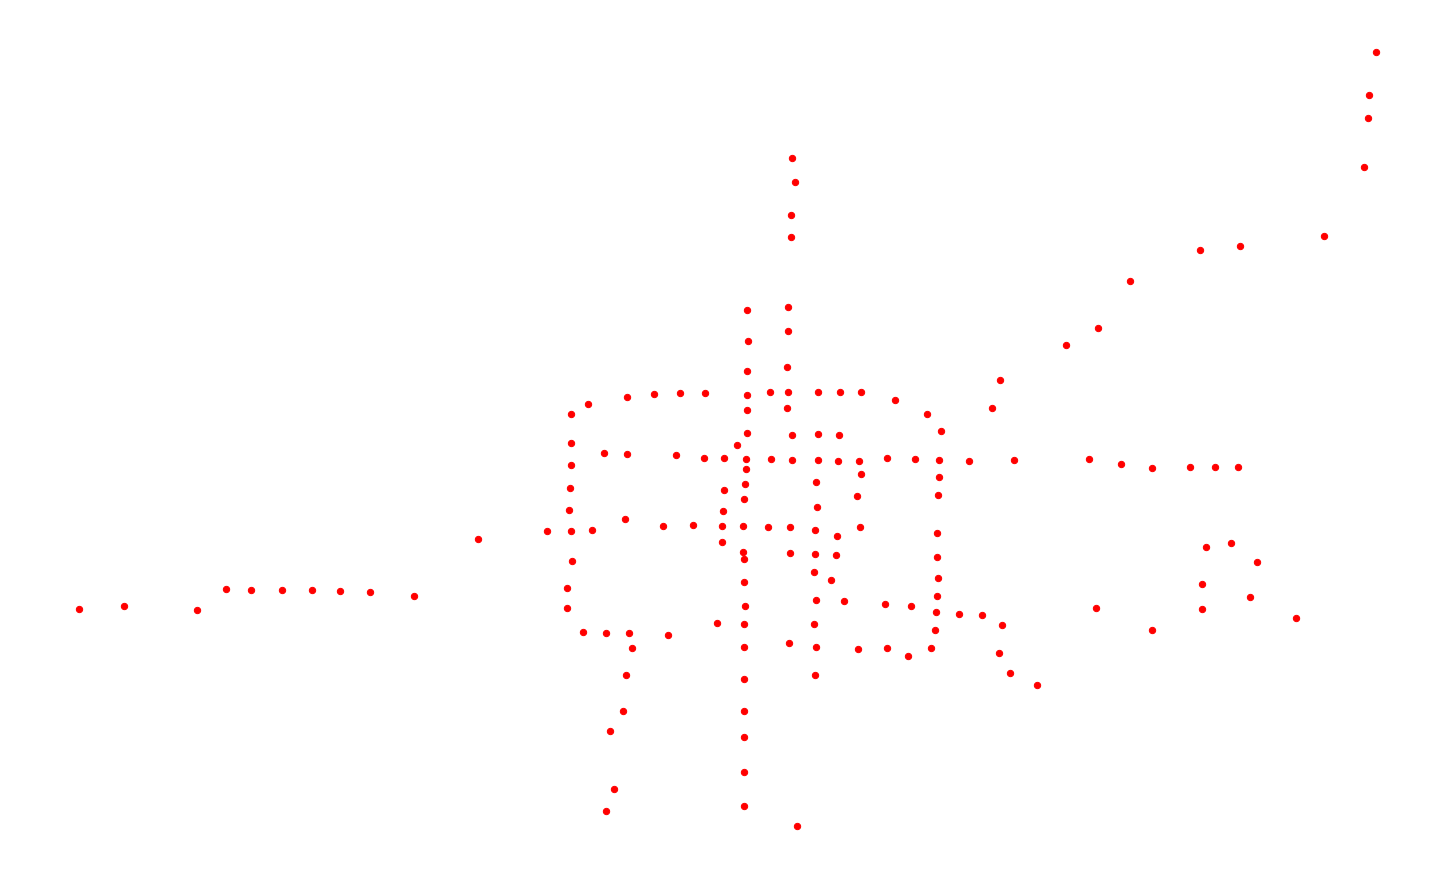

In [29]:
plt.figure(figsize=(20,12))
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_location_2.keys()))
nx.draw(station_graph, station_location_2, with_labels=False, node_size=40,node_color='r')

C:\Users\Liu Qiong\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


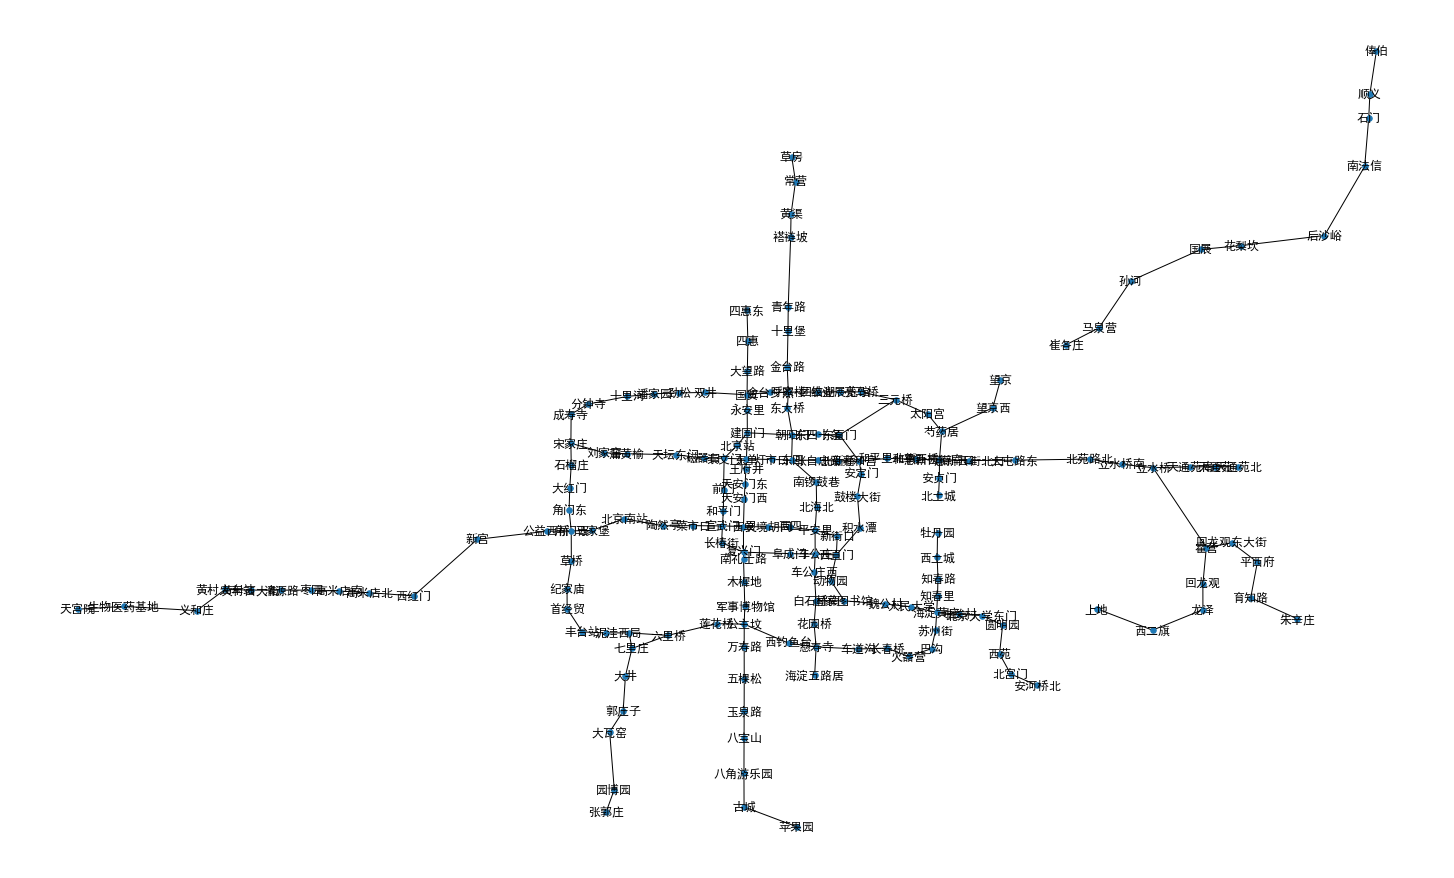

In [34]:
plt.figure(figsize=(20,12))
station_with_line=nx.Graph(station_connection_2)
nx.draw(station_with_line,station_location_2,with_labels=True,node_size=30)

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®') 
```
you need get the result: 

Â••‰Ωì‰∏≠ÂøÉ-> A -> B -> C -> ... -> Â§©ÂÆâÈó®



In [31]:
from collections import defaultdict
station_connection_info = defaultdict(list)
station_connection_info.update(station_connection_2)

In [37]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) 

In [38]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [42]:
search('Âåó‰∫¨ÂçóÁ´ô', 'Âπ≥ÂÆâÈáå',station_connection_info, sort_candidate=transfer_stations_first)

['Âåó‰∫¨ÂçóÁ´ô', 'Èô∂ÁÑ∂‰∫≠', 'ËèúÂ∏ÇÂè£', 'ÂÆ£Ê≠¶Èó®', 'Ë•øÂçï', 'ÁÅµÂ¢ÉËÉ°Âêå', 'Ë•øÂõõ', 'Âπ≥ÂÆâÈáå']

In [43]:
def pretty_print(cities):
    print('üöù->'.join(cities))

In [44]:
pretty_print(search('Âåó‰∫¨Á´ô', 'Âä®Áâ©Âõ≠',station_connection_info, sort_candidate=transfer_stations_first))

Âåó‰∫¨Á´ôüöù->Âª∫ÂõΩÈó®üöù->ÊúùÈò≥Èó®üöù->‰∏úÂõõüöù->ÂçóÈî£ÈºìÂ∑∑üöù->ÂåóÊµ∑Âåóüöù->Âπ≥ÂÆâÈáåüöù->Êñ∞Ë°óÂè£üöù->Ë•øÁõ¥Èó®üöù->Âä®Áâ©Âõ≠


## ÔºàOptionalÔºâCreate different policies for transfer system.


‰ª•‰∏ãÈÉ®Èó®‰∏∫ÂèØÈÄâÈÉ®ÂàÜÔºåËØ∑ÈÖåÊÉÖÂÆåÊàê„ÄÇ Âπ∂‰∏çË¶ÅÊ±ÇÂÖ®ÈÉ®ÂêåÂ≠¶ÂÆåÊàê„ÄÇ

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ, Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà), Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, ‚Ä¶ .., C, ‚Ä¶. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A ‚Ä¶ C ‚Ä¶ E ‚Ä¶ D ‚Ä¶ B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

Â∞Ü‰Ω†ÁöÑÁªìÊûúÂíåÈ´òÂæ∑Âú∞ÂõæÊàñËÄÖÁôæÂ∫¶Âú∞ÂõæËøõË°åÊØîËæÉÔºåÂ¶ÇÊûúÊúâ‰∏çÂêåÔºåËØ∑ÂàÜÊûêÂéüÂõ†


ÊÅ≠ÂñúÔºåÂÆåÊàêÊú¨Ê¨°ËØæÁ®ãÔºå‰Ω†ÂØπÂ∏∏Áî®ÁöÑ‰∫∫Â∑•Êô∫ËÉΩÊñπÊ≥ï‰ª•ÂèäÊúâ‰∏ÄÂÆöÁöÑ‰∫ÜËß£‰∫Ü„ÄÇÂü∫‰∫éËßÑÂàôÁöÑÔºåÂü∫‰∫éÊ¶ÇÁéáÊ®°ÂûãÁöÑÔºåÂü∫‰∫éÊêúÁ¥¢ÁöÑÔºåÂü∫‰∫éÊú∫Âô®Â≠¶‰π†ÁöÑ„ÄÇ ÂèØ‰ª•ËØ¥ÔºåÊàë‰ª¨Áé∞Âú®ÈÄöÂ∏∏ËßÅÂà∞ÁöÑÊñπÊ≥ïÈÉΩËÉΩÂ§üÂΩíÂ±ûÂà∞ËøôÂá†Á±ªÊñπÊ≥ï‰∏≠„ÄÇ ËøôÂ∞±ÊòØ**‰∫∫Â∑•Êô∫ËÉΩ**ÔºåÂπ∂Ê≤°ÊúâÂæàÈöæÊòØÂêßÔºü ÁªßÁª≠Âä†Ê≤πÔºÅ

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)